In [1]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Define the number of trading days to generate
n_days = 100

# --- Generate Data ---

# Create a date range
dates = pd.date_range(end='2023-04-28', periods=n_days, freq='B') # 'B' is for business day

# Generate stock prices
# Start with a base price and simulate daily changes
start_price = 33800
price_changes = np.random.randn(n_days).cumsum() * 50
open_prices = start_price + price_changes

# Create High, Low, and Close based on the Open price
fluctuations = np.abs(np.random.normal(0, 100, n_days))
close_prices = open_prices + np.random.normal(0, 50, n_days)
high_prices = np.maximum(open_prices, close_prices) + fluctuations
low_prices = np.minimum(open_prices, close_prices) - fluctuations

# Adjusted Close is typically very close to the Close price
adj_close_prices = close_prices * np.random.uniform(0.998, 1.002, n_days)

# Generate trading volume (large integers)
volumes = np.random.randint(200_000_000, 400_000_000, size=n_days)


# --- Create DataFrame ---
df_stocks = pd.DataFrame({
    'Date': dates,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Adj Close': adj_close_prices,
    'Volume': volumes
})

# Format the data to match the source image
price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
df_stocks[price_cols] = df_stocks[price_cols].round(2)

# Set Date as the index (this is a common practice for time series data)
df_stocks = df_stocks.set_index('Date')

# Sort by date in descending order to match the image format
df_stocks = df_stocks.sort_index(ascending=False)


# Display the first 5 rows
df_stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,33280.77,33426.55,33166.47,33312.25,33365.70,281052418
2023-04-27,33292.50,33338.96,33286.68,33333.14,33344.38,295856757
2023-04-26,33292.24,33322.98,33276.87,33307.61,33324.60,366261173
2023-04-25,33279.19,33412.55,33190.80,33324.17,33318.11,287220897
2023-04-24,33264.38,33302.91,33191.21,33229.74,33255.76,295282726


In [5]:
df_stocks = df_stocks.sort_index(ascending=True)

df_stocks['daily_range'] = df_stocks['High'] - df_stocks['Low']

print(df_stocks[['High', 'Low', 'daily_range']].head())

                High       Low  daily_range
Date                                       
2022-12-12  33984.26  33683.30       300.96
2022-12-13  33888.03  33775.86       112.17
2022-12-14  33938.73  33816.04       122.69
2022-12-15  34059.38  33846.23       213.15
2022-12-16  33930.88  33829.74       101.14


In [7]:
# Calculate the rolling mean of the 'Close' price over a 5-day window
df_stocks['ma_5_day'] = df_stocks['Close'].rolling(window=5).mean()

# Display the new feature
# Note: The first few values will be NaN because there isn't enough data yet
print(df_stocks[['Close', 'ma_5_day']].head(7))

               Close   ma_5_day
Date                           
2022-12-12  33842.73        NaN
2022-12-13  33845.96        NaN
2022-12-14  33904.46        NaN
2022-12-15  33979.15        NaN
2022-12-16  33845.87  33883.634
2022-12-19  33856.15  33886.318
2022-12-20  34007.76  33918.678


By comparing the two columns, you can get a quick signal about the stock's short-term momentum.

On 2022-12-16, the closing price (33845.87) is lower than the 5-day average (33883.63). This is a slightly bearish signal, indicating the day ended weaker than the recent trend.

On 2022-12-20, the closing price (34007.76) is higher than the 5-day average (33918.67). This is a bullish signal, suggesting stronger performance and positive momentum.


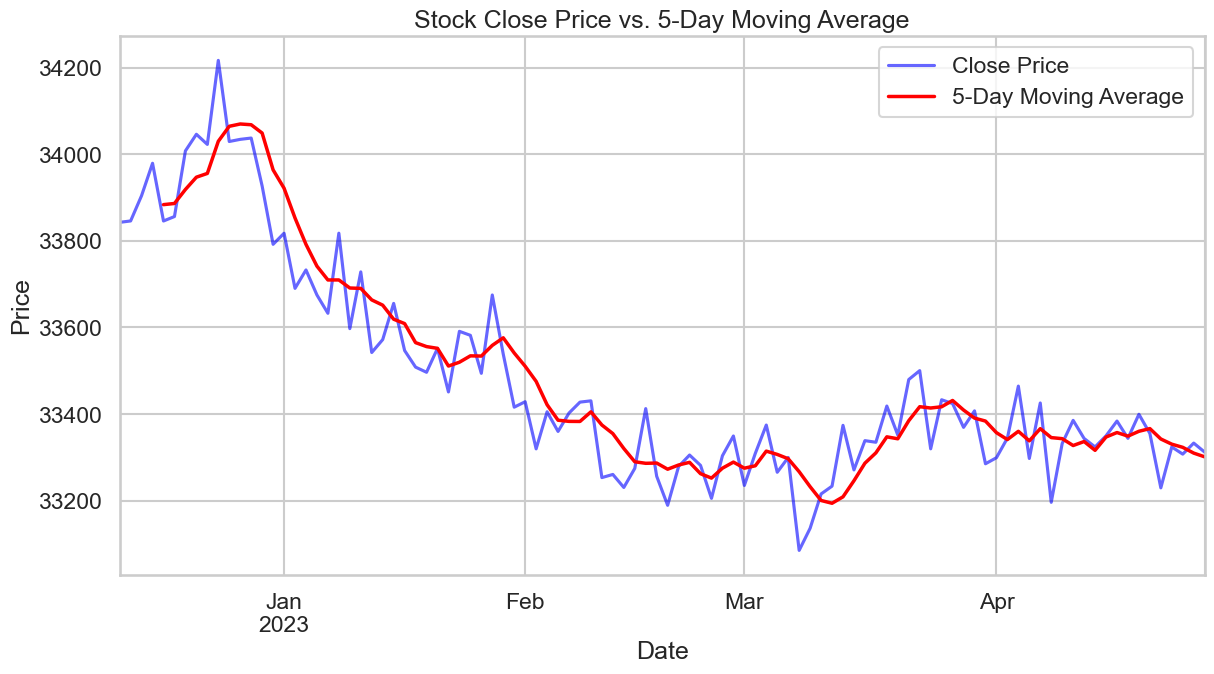

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid', context='talk')

# Plot the original Close price and the 5-Day Moving Average
plt.figure(figsize=(14, 7))
df_stocks['Close'].plot(label='Close Price', color='blue', alpha=0.6)
df_stocks['ma_5_day'].plot(label='5-Day Moving Average', color='red', linewidth=2.5)

plt.title('Stock Close Price vs. 5-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

When the Close Price (blue) crosses above the Moving Average (red), it can indicate that a downtrend is reversing and an uptrend may be starting.

When the Close Price (blue) crosses below the Moving Average (red), it can signal the start of a downtrend, as seen in early January.